# <center> Module 5

Group: 12<br>
Darko Petrov<br>
Alexander Lendon

#### 1

#### 2

(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(

C:\Users\darko\AppData\Local\Temp\ipykernel_25024\3934971264.py:106: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


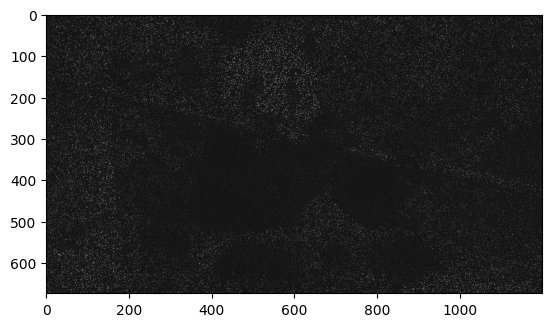

In [1]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as transform

img = iio.imread("panda.png")
# generating grayscale image:
bw_img=np.sum(img,2)/3
N = bw_img.shape[0]*img.shape[1]
# Take a number sample_num of samples and generate their
# horizontal and vertical coordinates (indicies) randomly in arrays xcoord, ycoord
sample_num = int(N * 0.05)  # 5% of N
xcoord = np.random.randint(0, bw_img.shape[0], sample_num)
ycoord = np.random.randint(0, bw_img.shape[1], sample_num)

# Store these samples in an array called y.
y = bw_img[xcoord, ycoord]

# The goal is to find the dct components x of the image from y and
# then use inverse dct to reconstruct the image.

def sq_loss_gradient(x,y, xcoord, ycoord):
    # samp_approx is Ax
    img_approx= transform.idct(transform.idct(x, axis=1, norm='ortho'),axis=0, norm='ortho')
    print(y.shape, xcoord.shape, ycoord.shape)
    samp_approx=np.zeros(y.shape)
    for l in range(y.shape[0]):
        samp_approx[l]=img_approx[xcoord[l],ycoord[l]]

    # The following calculates e=Ax-y
    error=samp_approx-y
    img_err=np.zeros(bw_img.shape)
    for l in range(sample_num):
        img_err[xcoord[l],ycoord[l]]=error[l]
    # This calculates A^Te which is the gradient 
    grad=transform.dct(transform.dct(img_err, axis=0, norm='ortho'),axis=1, norm='ortho')

    return grad, samp_approx

def shrinkage(x,alpha):
    # Implement the shrinkage operator which is the proximal operator
    # of the regularizer
    return np.sign(x) * np.maximum(np.abs(x) - alpha, 0)
    
def calculate_obj_ISTA(x, y, Ax, lamb):
    return np.sum((y - Ax) + lamb*np.linalg.norm(x))

def ISTA(y, xcoord, ycoord, alpha, xinit, step=0.99, iternum=100):
    # Implement the iteration and also calculate the objective value and
        # the vaue of the regularization term at each iteration
        # Calculate the gradient
    # Initialization:
    x = []  # Initialize x
    x.append(xinit)  # x[0] is the initial point
    obj_val = []
    
    for iter in range(iternum):
        grad, Ax = sq_loss_gradient(x[-1], y, xcoord, ycoord)
        x_hat = x - step*grad
        x  = shrinkage(x_hat, alpha)
        obj_val.append(calculate_obj_ISTA(x, y, Ax, step))
    return x[-1]

def FISTA(y, xcoord, ycoord, alpha, xinit, step=0.99, iternum=100):
    # Implement the FISTA algorithm similar to ISTA
    # It needs extra variables t and z    
    # Initialization:
    x = np.zeros((iternum, xinit.shape[0], xinit.shape[1]))  # Initialize x
    z = x.copy()  # Initialize z
    t = np.zeros(iternum)  # Initialize t
    t[0] = 1  # t[0] is the initial point

    for iter in range(iternum - 1):
        x_old = x[iter]
        z_old = z[iter]
        t_old = t[iter]

        # Compute the gradient at z
        grad = sq_loss_gradient(z_old, y, xcoord, ycoord)

        # Update x
        print(z_old[iter])
        x[iter+1] = shrinkage(z_old[iter] - step * grad, alpha)

        # Update t
        t[iter+1] = (1 + np.sqrt(1 + 4 * t_old**2)) / 2

        # Update z
        z[iter+1] = x[iter+1] + ((t_old - 1) / t[iter+1]) * (x[iter+1] - x_old)

    return x[iter+1]

# run ISTA/FISTA and generate the approximate DCT coefficients x
# Then, generate the recovered image
    #aplha is related to the step size and a regularisation parameter
alpha = 0.1
x_ISTA = ISTA(y, xcoord, ycoord, alpha, np.zeros(bw_img.shape), step=0.99, iternum=100)
img_approx_ISTA = transform.idct(transform.idct(x_ISTA, axis=1),axis=0, norm='ortho')

#x_FISTA = FISTA(y, xcoord, ycoord, 0.1, np.zeros(bw_img.shape), step=0.99, iternum=100)
#img_approx_FISTA = transform.idct(transform.idct(x_FISTA, axis=1),axis=0, norm='ortho')

# Plot the result
fig = plt.figure()    
plt.imshow(img_approx_ISTA, cmap='gray')
fig.show()

# Plot the result
#fig = plt.figure()    
#plt.imshow(img_approx_FISTA, cmap='gray')
#fig.show()


## Q3.

### 1.

When $B$ is unconstrained and each column of $R$ is zero except in exactly one entry, where it is one, the $BR$ is going to become one dimentional vector with zeros everywhere except for one entry. Considering the k-means clustering objective function

$$
\arg\min_S \sum^k_{i=1} \sum_{x_j \in S_i} ||x - \mu_i||^2
$$

$BR$ becomes the same as $\mu$ vector in k-means clustering as only one dimension is going to have value and the rest are going to be zero. Therefore, the objective function becomes the same as the k-means clustering objective function.

### 2.

First we can rewrite the loss function as:

$$
L(R,B) = ||X-BR||^2_F = \frac{1}{2}tr((X-BR)^T(X-BR)) = \frac{1}{2}tr(X^TX - X^TBR - R^TB^TX + R^TB^TBR)
$$

Now we can take the derivative with respect to $R$:

$$
\frac{\partial L}{\partial R} = \frac{\partial \frac{1}{2}tr(X^TX - X^TBR - R^TB^TX + R^TB^TBR)}{\partial R}
$$

we get:

$$
\frac{\partial L}{\partial R} = \frac{-2B^TX + 2B^TBR}{2} = B^T(BR - X) 
$$

Replacing $BR - X$ with $E$ we get:

$$
\frac{\partial L}{\partial R} = B^TE
$$

Now we do the same and take the derivative with respect to $B$:


$$
\frac{\partial L}{\partial B} = \frac{\partial \frac{1}{2}tr(X^TX - X^TBR - R^TB^TX + R^TB^TBR)}{\partial B}  
$$

$$
\frac{\partial L}{\partial B} = \frac{-2XR^T + 2BR(R^T)}{2} = (BR - X)R^T
$$

We replace $BR - X$ with $E$ and we get:

$$
\frac{\partial L}{\partial B} = ER^T
$$

Converged at iteration 11694, for beta = 0.99


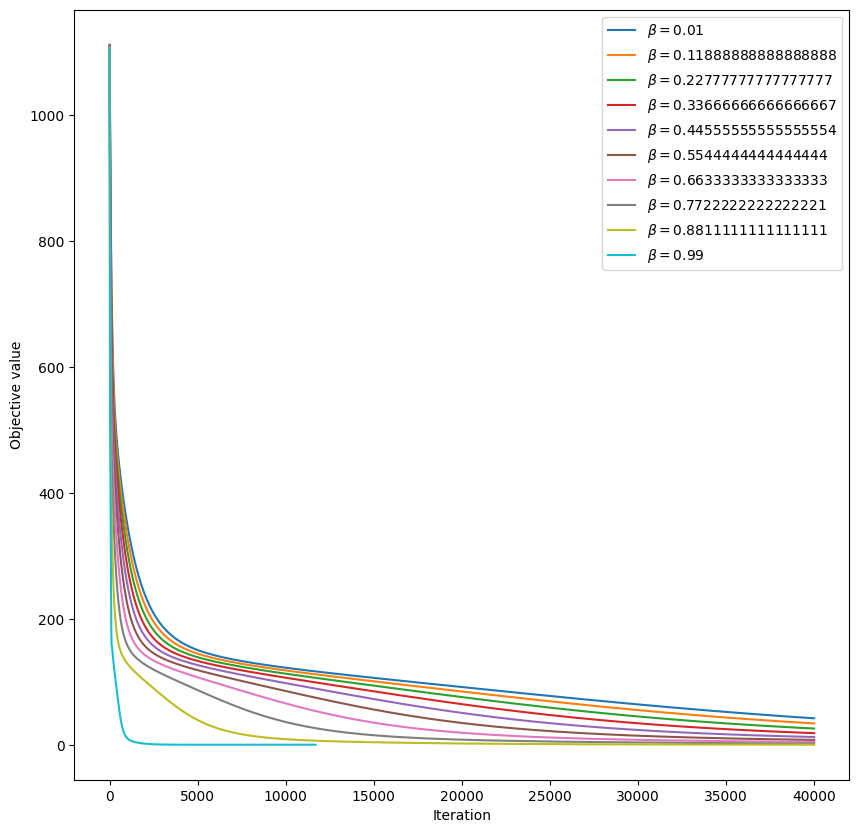

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def objective_func(b, r, X):
    return (np.linalg.norm(X-(b @ r))**2)/2


def proximal_gradient(B, R, X, beta, step_size, max_iter=40000):
    obj_val = []
    B_x = B.copy()
    R_x = R.copy()
    B_v = B.copy()
    R_v = R.copy()
    B_prev, R_prev = B, R
    
    
    for t in range(max_iter):
        E = np.dot(B, R) - X

        # Compute gradients
        dB = np.dot(E, R.T)
        dR = np.dot(B.T, E)

        B_x = B - step_size * dB
        R_x = R - step_size * dR
        # B_x = np.clip(B_x, 0, 1)
        # R_x = np.clip(R_x, 0, 1)
        
        
        B_v = B_x + beta * (B_x - B_prev)
        R_v = R_x + beta * (R_x - R_prev)
                
        if objective_func(B_x, R_x, X) <= objective_func(B_v, R_v, X):
            B = B_x
            R = R_x
            
        else:
            B = B_v
            R = R_v

        
        # B = np.clip(B, 0, 1)
        # R = np.clip(R, 0, 1)
        # Compute the objective value
        obj_val.append(objective_func(B, R, X))
        
        B_prev, R_prev = B_x, R_x
        # Check for convergence
        if t > 0 and np.abs(obj_val[-1] - obj_val[-2]) < 1e-10:
            print(f'Converged at iteration {t}, for beta = {beta}')
            break
        

    return B, R, obj_val


# Generate the true matrices B and R
np.random.seed(2)
B_true = np.random.choice([0, 1], size=(10, 20), p=[0.5, 0.5])
R_true = np.random.uniform(0, 1, size=(20, 100))

# Generate the observed matrix X
X = B_true @ R_true

# Initialize B and R randomly
B_init = np.random.uniform(0, 1, size=(10, 20))
R_init = np.random.uniform(0, 1, size=(20, 100))

# betas = [0.01, 0.1, 0.5, 0.9, 0.99]
betas = np.linspace(0.01,0.99,10)

plt.figure(figsize=(10, 10))
for beta in betas:
    # Run the proximal gradient method
    B_est, R_est, losses = proximal_gradient(B_init, R_init, X, beta, step_size=1e-5)

    # Plot the convergence of the algorithm
    plt.plot(losses)
    plt.xlabel('Iteration')
    plt.ylabel('Objective value')
plt.legend([f'$\\beta = {beta}$' for beta in betas])
plt.show()




### 3.

(a) 

The results differ as B and R are initialized randomly, but they all converge the same way and the end results are the same for all realizations. 

(b)

The best $\beta$ value for minimizing L is as close to 1 as in the plot above beta 0.99 converges the fastest and has the lowest loss value. 